In [182]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import math
import matplotlib.dates as mdates
from datetime import datetime


In [183]:
pod_name = 'NA40'
total_time = 10 * 60  # seconds

In [226]:
cpu_time = pd.read_csv('training_na40_5_8.csv')
#cpu_time = pd.read_csv('bajaj_4_2.csv')
cpu_time.head()

,_time,host,totalCPUTime,num_user,count
0,2019-05-08T00:00:00.000+0000,na40-app1-1-dfw.ops.sfdc.net,1158571,3173,12573
1,2019-05-08T00:00:00.000+0000,na40-app1-10-dfw.ops.sfdc.net,900043,2789,11302
2,2019-05-08T00:00:00.000+0000,na40-app1-11-dfw.ops.sfdc.net,980855,2688,10858
3,2019-05-08T00:00:00.000+0000,na40-app1-12-dfw.ops.sfdc.net,549131,2732,7223
4,2019-05-08T00:00:00.000+0000,na40-app1-13-dfw.ops.sfdc.net,1292014,2731,11184


In [227]:
hardware = pd.read_csv('hardwarereport.csv')
hardware = hardware[hardware['Pod'] == pod_name]
hardware['host'] = hardware['Host Name'].apply(lambda x: x + '.ops.sfdc.net')
hardware['processors'] = hardware['CPU_Count'] * hardware['# of CPU Cores']
hardware = hardware[['host','CPU_Model' ,'CPU_Count','# of CPU Cores','processors']]
#hardware.columns = ['host','CPU_Model' ,'cores']
hardware.head()

,host,CPU_Model,CPU_Count,# of CPU Cores,processors
1287,na40-db1-2-phx.ops.sfdc.net,Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz Step...,2.0,44.0,88.0
1289,na40-dgdb1-1-phx.ops.sfdc.net,Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz Step...,2.0,44.0,88.0
1675,na40-db1-12-phx.ops.sfdc.net,Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz Step...,2.0,44.0,88.0
1923,na40-db1-4-phx.ops.sfdc.net,Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz Step...,2.0,44.0,88.0
2112,na40-dgdb1-1-dfw.ops.sfdc.net,Intel(R) Xeon(R) CPU E5-2699 v4 @ 2.20GHz Step...,2.0,44.0,88.0


In [228]:
#cpu_time[cpu_time['organizationId']!='00Do0000000Z0MM']

In [235]:
data = cpu_time.join(hardware.set_index('host'), on='host', how='left')
data.head()

,_time,host,totalCPUTime,num_user,count,CPU_Model,CPU_Count,# of CPU Cores,processors
0,2019-05-08T00:00:00.000+0000,na40-app1-1-dfw.ops.sfdc.net,1158571,3173,12573,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0
1,2019-05-08T00:00:00.000+0000,na40-app1-10-dfw.ops.sfdc.net,900043,2789,11302,Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz Step...,2.0,28.0,56.0
2,2019-05-08T00:00:00.000+0000,na40-app1-11-dfw.ops.sfdc.net,980855,2688,10858,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0
3,2019-05-08T00:00:00.000+0000,na40-app1-12-dfw.ops.sfdc.net,549131,2732,7223,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0
4,2019-05-08T00:00:00.000+0000,na40-app1-13-dfw.ops.sfdc.net,1292014,2731,11184,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0


# If the CPU time is number of cycles

In [188]:
# def get_clock_speed(CPU_Model):
#     clock_speed = re.search('@(.+)GHz', CPU_Model).group(1)
#     return float(clock_speed)*1e9
# data = data.dropna() # There is some hardware we don't have its 'cores'
# data['clock_speed'] = data['CPU_Model'].apply(get_clock_speed)
# data['cpu_usage'] = data['totalCPUTime'] * 100 / (data['clock_speed'] * data['cores'] * total_time)
# data.head()

# Else the CPU time is in milliseconds

In [236]:
def get_clock_speed(CPU_Model):
    clock_speed = re.search('@(.+)GHz', CPU_Model).group(1)
    return float(clock_speed)*1e9
data = data.dropna() # There is some hardware we don't have its 'cores'
data['clock_speed'] = data['CPU_Model'].apply(get_clock_speed)
data['cpu_usage'] = data['totalCPUTime'] * 100 / (data['processors'] * total_time*1000)#num of processors includes hyperthreading(usually 2)
data.index = range(len(data))
data.head()

,_time,host,totalCPUTime,num_user,count,CPU_Model,CPU_Count,# of CPU Cores,processors,clock_speed,cpu_usage
0,2019-05-08T00:00:00.000+0000,na40-app1-1-dfw.ops.sfdc.net,1158571,3173,12573,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0,2.300000e+09,4.022816
1,2019-05-08T00:00:00.000+0000,na40-app1-10-dfw.ops.sfdc.net,900043,2789,11302,Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz Step...,2.0,28.0,56.0,2.400000e+09,2.678699
2,2019-05-08T00:00:00.000+0000,na40-app1-11-dfw.ops.sfdc.net,980855,2688,10858,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0,2.300000e+09,3.405747
3,2019-05-08T00:00:00.000+0000,na40-app1-12-dfw.ops.sfdc.net,549131,2732,7223,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0,2.300000e+09,1.906705
4,2019-05-08T00:00:00.000+0000,na40-app1-13-dfw.ops.sfdc.net,1292014,2731,11184,Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz Step...,2.0,24.0,48.0,2.300000e+09,4.486160


# Validation

In [237]:
# data = data.groupby(['_time','host','processors']).sum()
# data.head()

In [231]:
# sum_by_core = data.groupby(['_time','processors']).mean()
# sum_by_core.head()

In [232]:
cores = data['# of CPU Cores'].unique()

In [193]:
# list_data_core={}
# for core in cores:
#     data_core = data[data['# of CPU Cores']==core]
#     data_core = data_core.groupby(['_time']).mean()
#     data_core = data_core[['cpu_usage']]
#     data_core['time'] = data_core.index
#     #data_core.index = range(len(data_core))
#     list_data_core[core] = data_core
# print list_data_core[28]

In [194]:
# data_24 = data[data['processors']==48]
# data_24 = data_24.groupby(['_time']).mean()
# data_24 = data_24[['cpu_usage']]
# data_24['time'] = data_24.index

# data_28 = data[data['processors']==56]
# data_28 = data_28.groupby(['_time']).mean()
# data_28 = data_28[['cpu_usage']]
# data_28['time'] = data_28.index

# data_28.head()

In [195]:
# multiple line plot
# plt.plot( 'time', 'cpu_usage', data=data_24, label = 'cores = 24', marker='', color='skyblue', linewidth=2)
# plt.plot( 'time', 'cpu_usage', data=data_28, label = 'cores = 28', marker='', color='olive', linewidth=2)
# plt.ylabel('CPU Usage(%)')
# plt.xlabel('Time')
# plt.legend()


In [238]:
list_stats_core = {}
for core in cores:
    stats_core = data[data['# of CPU Cores']==core].groupby(['_time'])['cpu_usage'].agg(['mean', 'count', 'std'])
    #stats_core.index = range(len(stats_core))
    stats_core = stats_core.fillna(0)
    ci95_hi = []
    ci95_lo = []
    for i in stats_core.index:        
        m, c, s = stats_core.loc[i]
        #print i, m, c, s
        ci95_hi.append(m + 1.96*s/math.sqrt(c))
        ci95_lo.append(m - 1.96*s/math.sqrt(c))
    stats_core['ci95_hi'] = ci95_hi
    stats_core['ci95_lo'] = ci95_lo

    list_stats_core[core] = stats_core
print list_stats_core[24]

                                   mean  count       std    ci95_hi    ci95_lo
_time                                                                         
2019-05-08T00:00:00.000+0000   3.546132     24  0.622055   3.795006   3.297258
2019-05-08T00:10:00.000+0000   2.882800     24  0.495621   3.081090   2.684511
2019-05-08T00:20:00.000+0000   2.725984     24  0.357743   2.869111   2.582857
2019-05-08T00:30:00.000+0000   2.272799     24  0.352830   2.413960   2.131637
2019-05-08T00:40:00.000+0000   2.216459     24  0.323660   2.345950   2.086969
2019-05-08T00:50:00.000+0000   1.764936     24  0.359151   1.908627   1.621246
2019-05-08T01:00:00.000+0000   2.453453     24  0.519555   2.661318   2.245588
2019-05-08T01:10:00.000+0000   3.137199     24  0.658110   3.400497   2.873900
2019-05-08T01:20:00.000+0000   3.471513     24  0.760273   3.775686   3.167341
2019-05-08T01:30:00.000+0000   2.810291     24  0.498604   3.009774   2.610808
2019-05-08T01:40:00.000+0000   2.589108     24  0.31

In [197]:
# stats_24 = data[data['processors']==48].groupby(['_time'])['cpu_usage'].agg(['mean', 'count', 'std'])
# ci95_hi = []
# ci95_lo = []
# for i in stats_24.index:
#     m, c, s = stats_24.loc[i]
#     ci95_hi.append(m + 1.96*s/math.sqrt(c))
#     ci95_lo.append(m - 1.96*s/math.sqrt(c))
# stats_24['ci95_hi'] = ci95_hi
# stats_24['ci95_lo'] = ci95_lo

# stats_28 = data[data['processors']==56].groupby(['_time'])['cpu_usage'].agg(['mean', 'count', 'std'])
# ci95_hi = []
# ci95_lo = []
# for i in stats_28.index:
#     m, c, s = stats_28.loc[i]
#     ci95_hi.append(m + 1.96*s/math.sqrt(c))
#     ci95_lo.append(m - 1.96*s/math.sqrt(c))
# stats_28['ci95_hi'] = ci95_hi
# stats_28['ci95_lo'] = ci95_lo

# stats_24.head()

In [239]:
# mean_stats_24 = stats_24['mean'].values
# ub_stats_24 = stats_24['ci95_hi'].values
# lb_stats_24 = stats_24['ci95_lo'].values
# mean_stats_28 = stats_28['mean'].values
# ub_stats_28 = stats_28['ci95_hi'].values
# lb_stats_28 = stats_28['ci95_lo'].values

#stats_24['time'] = stats_core.index
time_line = stats_core.index.values

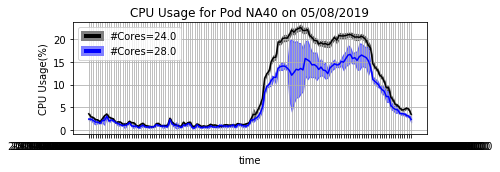

In [241]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(time_line, mean, color_mean)
    
 
# plot the data
fig = plt.figure(1, figsize=(7, 2.5))
colors = ['black', 'blue', 'green']
for i in range(len(cores)):
    core = cores[i]
    color = colors[i]
    #print list_stats_core[core]['ci95_hi'].values
    plot_mean_and_CI(list_stats_core[core]['mean'].values, list_stats_core[core]['ci95_hi'].values, list_stats_core[core]['ci95_lo'].values, color_mean=color, color_shading=color)
#plot_mean_and_CI(mean_stats_28, ub_stats_28, lb_stats_28, color_mean='b', color_shading='b')
#plot_mean_and_CI(mean2, ub2, lb2, color_mean='g--', color_shading='g')
 
class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 
bg = np.array([1, 1, 1])  # background of the legend is white
colors = ['black', 'blue', 'green']

# with alpha = .5, the faded color is the average of the background and color
colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]

handler_map = {}
for i in range(len(cores)):
    handler_map[i] = LegendObject(colors[i], colors_faded[i])
plt.legend(range(len(cores)), ['#Cores='+str(core) for core in cores],
           handler_map=handler_map)
    
# plt.legend([0, 1], ['#Cores=24', '#Cores=28'],
#            handler_map={
#                0: LegendObject(colors[0], colors_faded[0]),
#                1: LegendObject(colors[1], colors_faded[1]),
#             })
 
plt.title('CPU Usage for Pod NA40 on 05/08/2019')
plt.xlabel('time')
plt.ylabel('CPU Usage(%)')
#my_x_ticks = np.arange(00：00：00, 24：00：00, 0.5)
#plt.xticks(my_x_ticks)

plt.tight_layout()
plt.grid()
plt.show()

# Training

In [ ]:
cpu_time = pd.read_csv('training_state_farm_5_8.csv')
cpu_time

In [ ]:
a = [1,2,3]
print a.pop()
print a.pop()